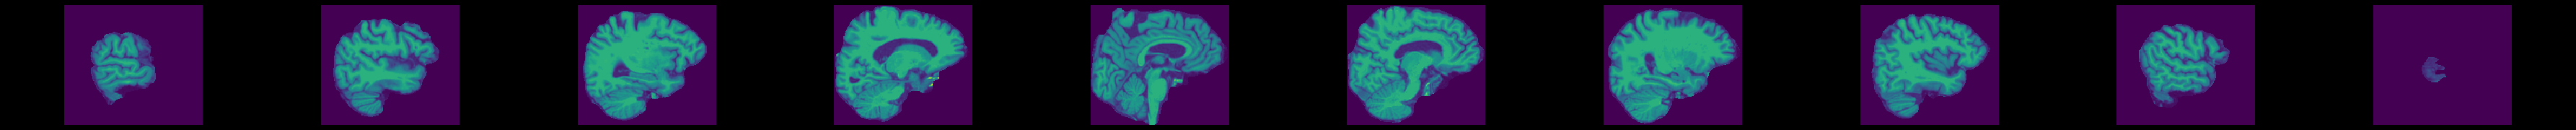

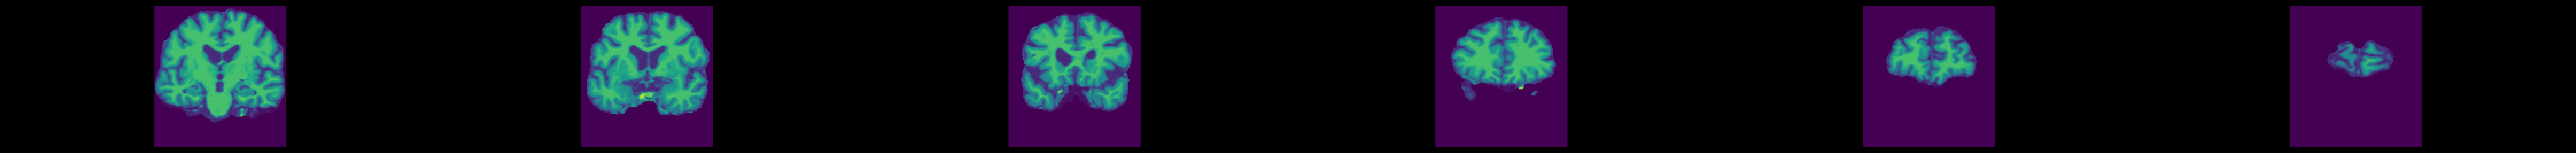

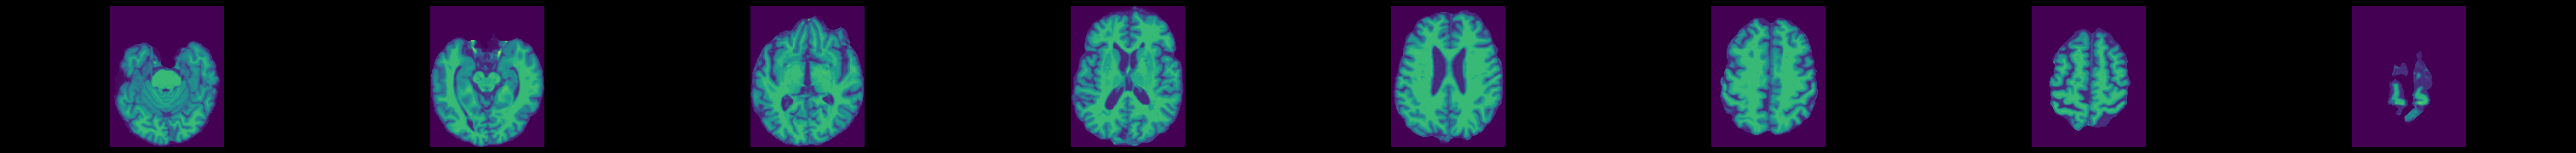

processed: ../../ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-04-18_08_20_30.0/S13408/mri/image.nii


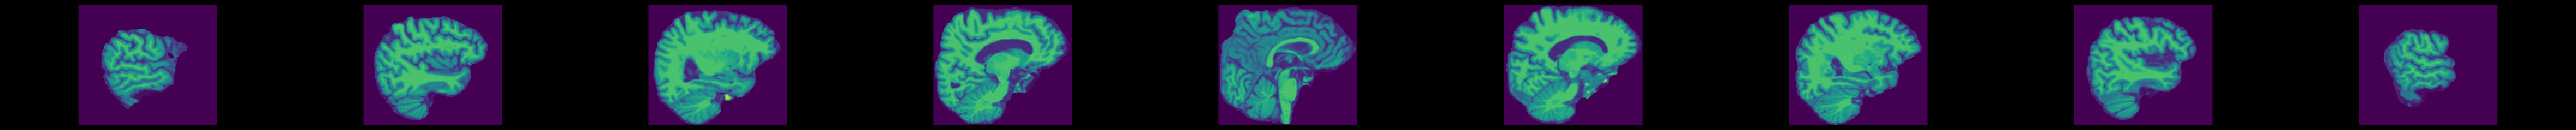

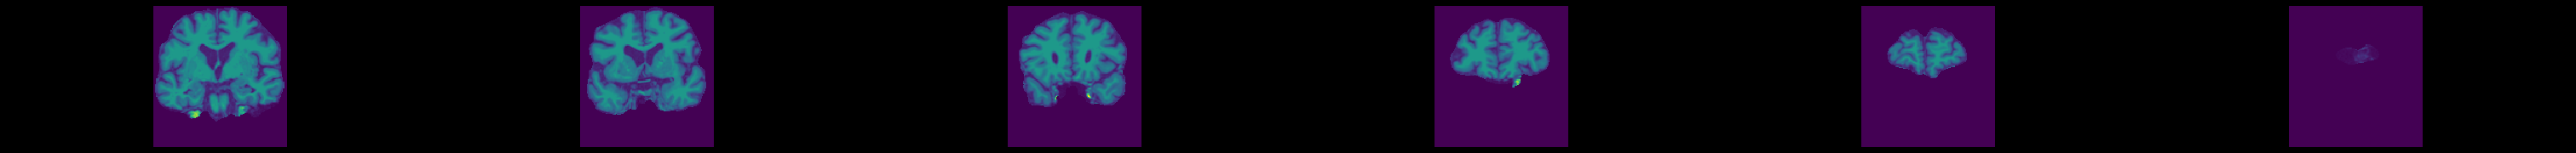

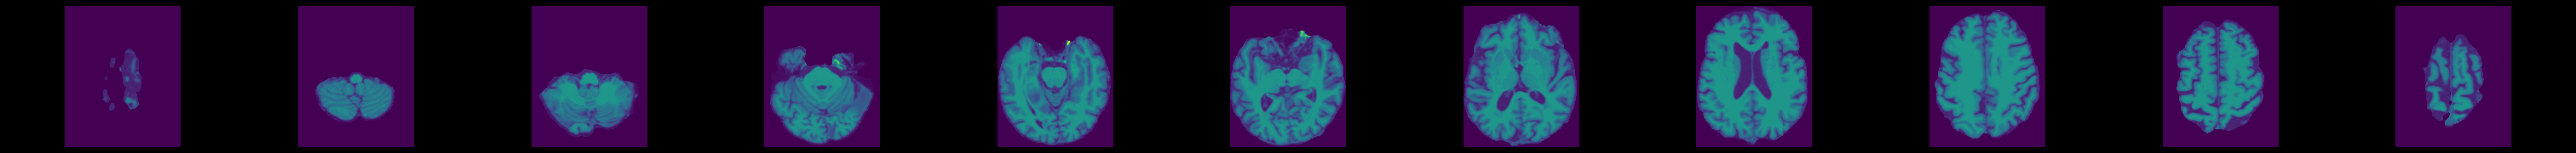

processed: ../../ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-11-02_08_16_44.0/S21856/mri/image.nii


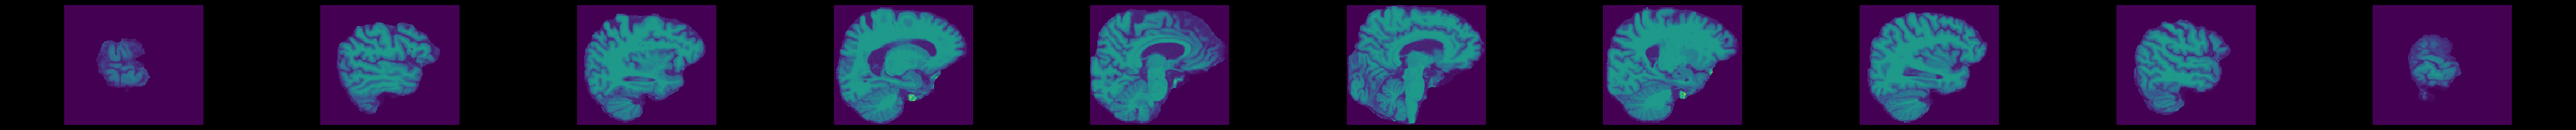

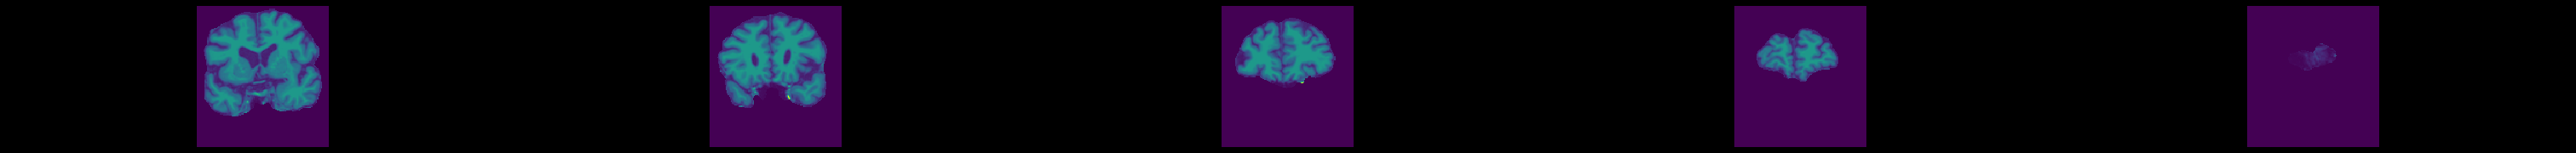

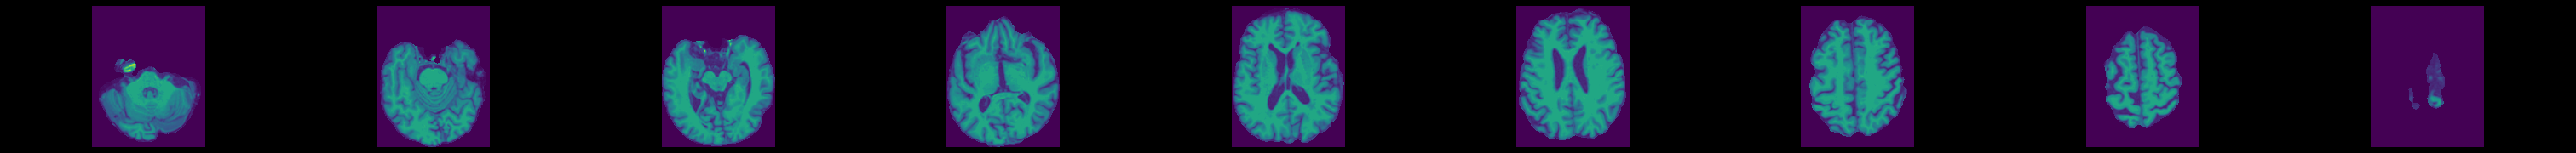

processed: ../../ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2007-05-25_07_12_36.0/S32678/mri/image.nii


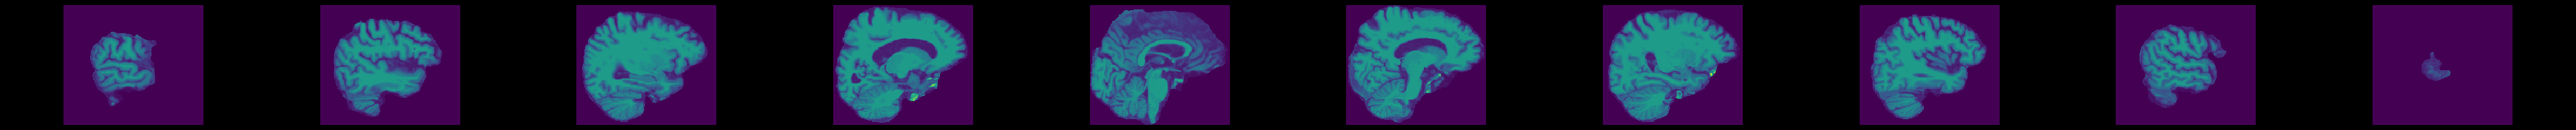

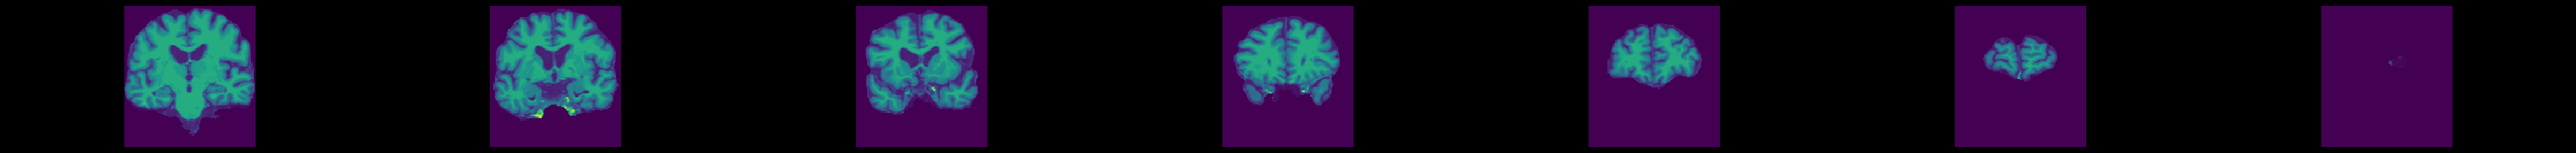

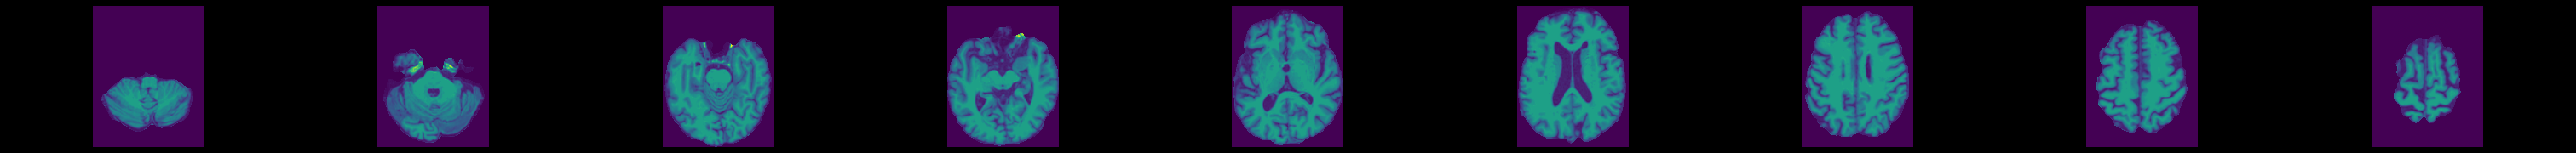

processed: ../../ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2008-07-23_14_51_41.0/S54061/mri/image.nii


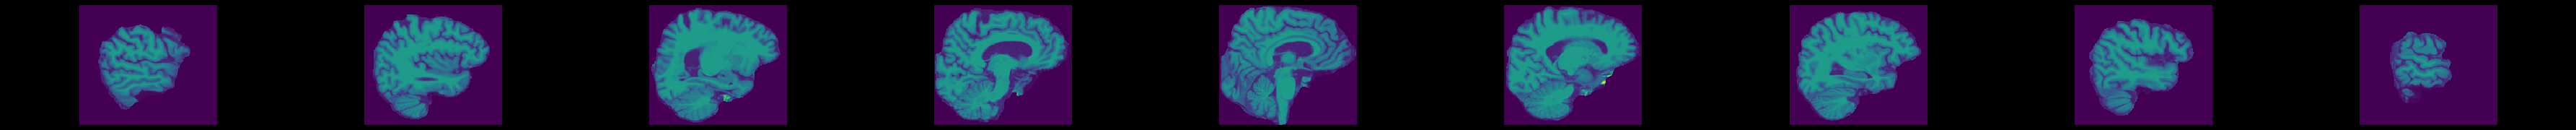

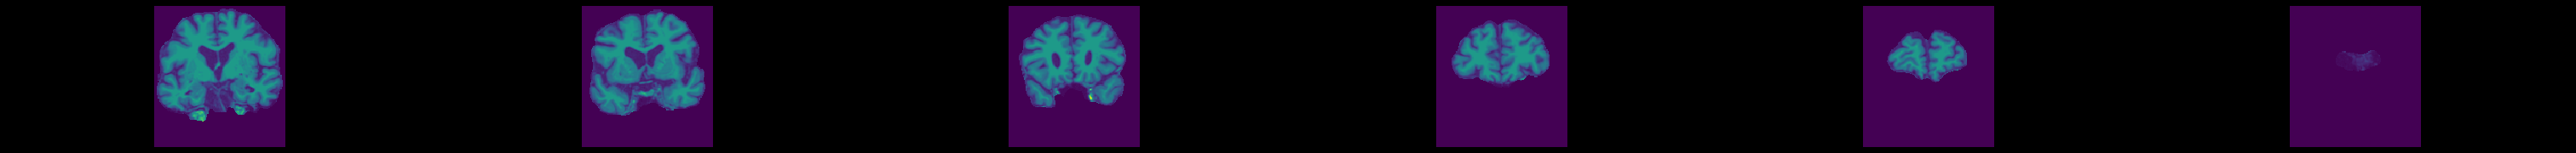

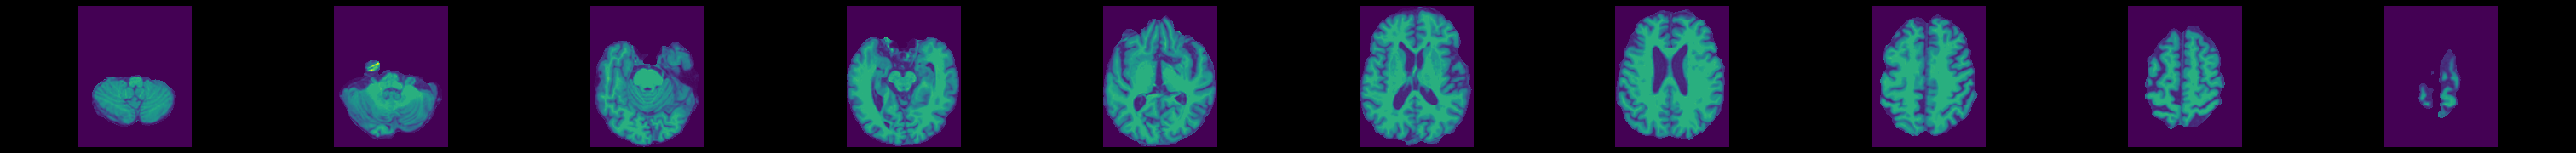

processed: ../../ADNI/002_S_0295/FreeSurfer_Cross-Sectional_Processing_brainmask/2009-05-22_07_00_57.0/S67612/mri/image.nii


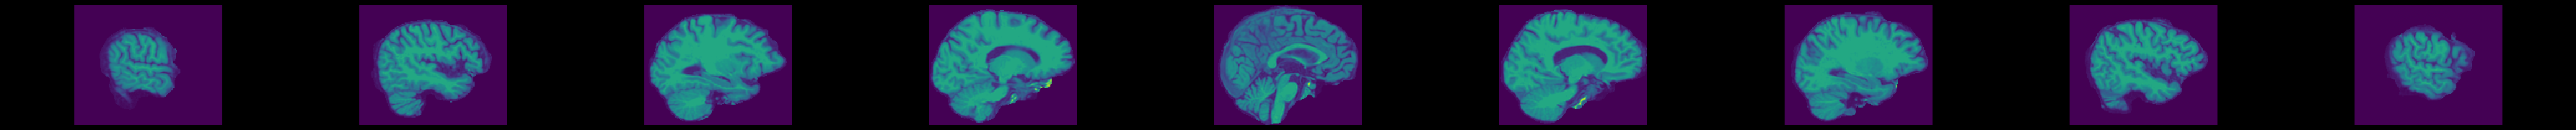

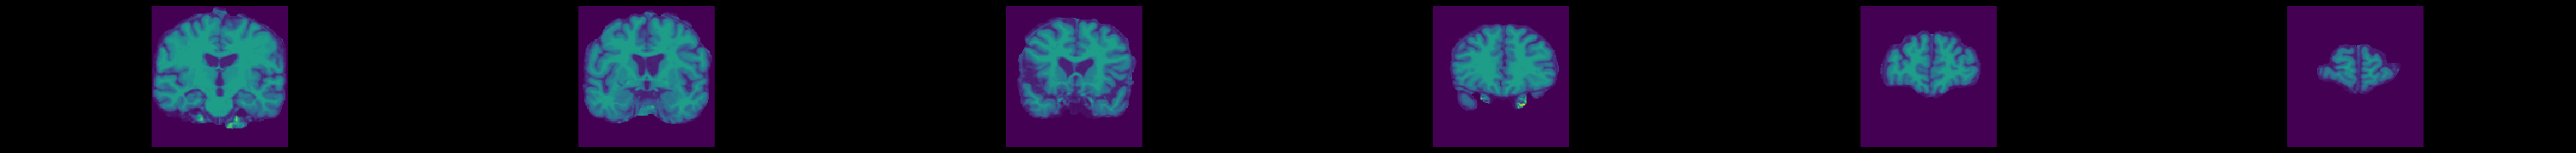

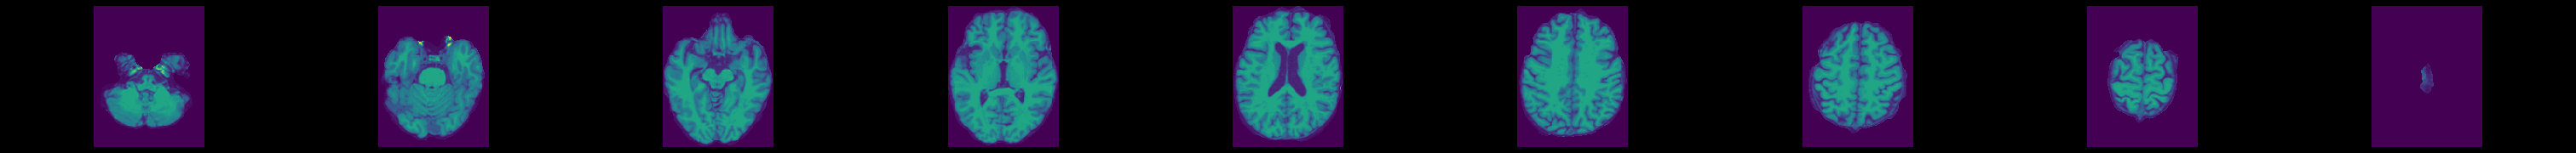

processed: ../../ADNI/002_S_0413/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-05-02_12_31_52.0/S13893/mri/image.nii


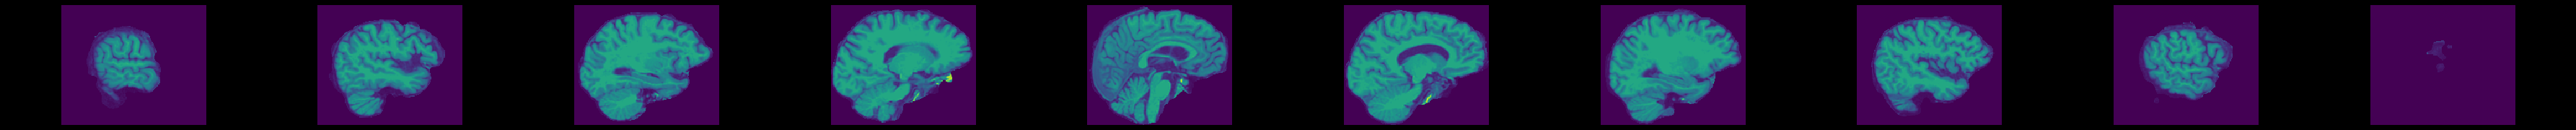

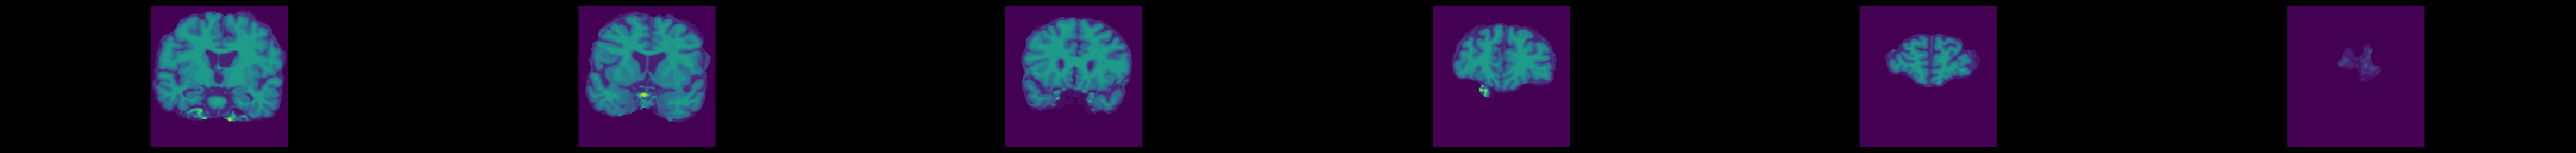

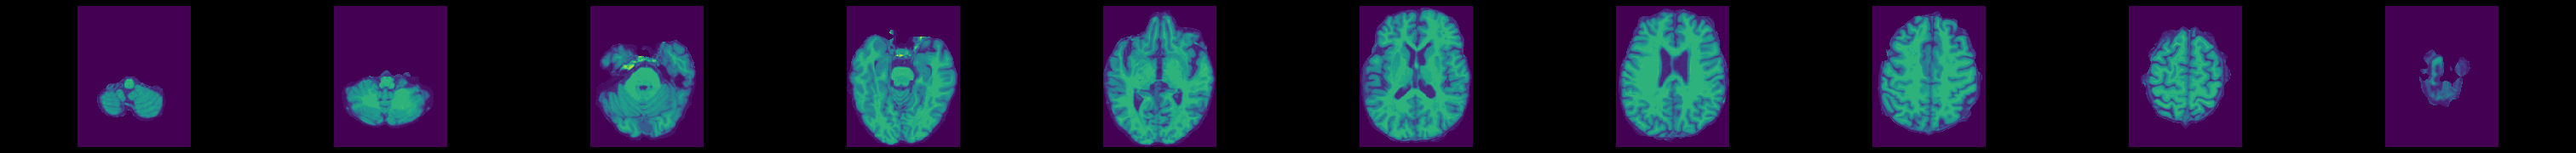

processed: ../../ADNI/002_S_0413/FreeSurfer_Cross-Sectional_Processing_brainmask/2006-11-15_09_30_01.0/S22557/mri/image.nii


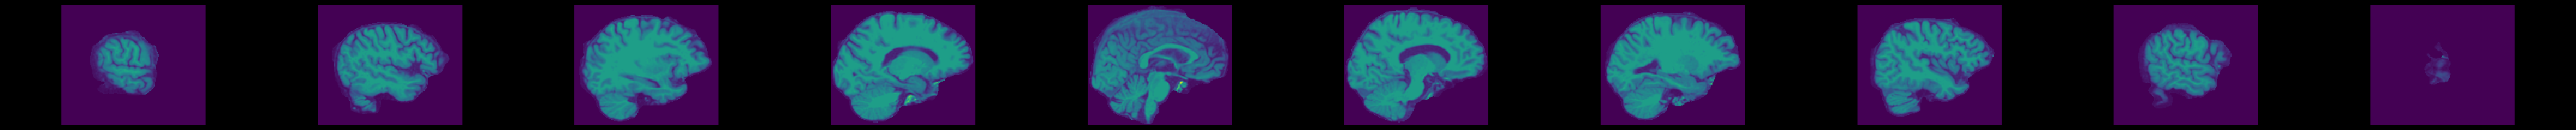

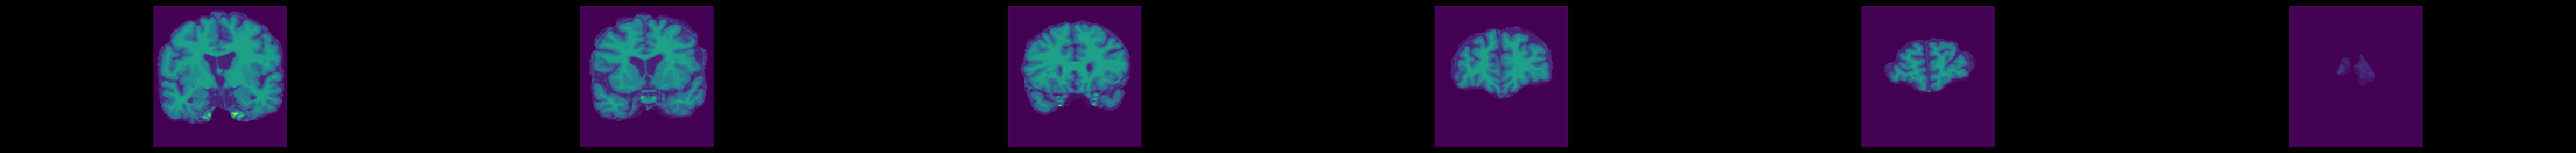

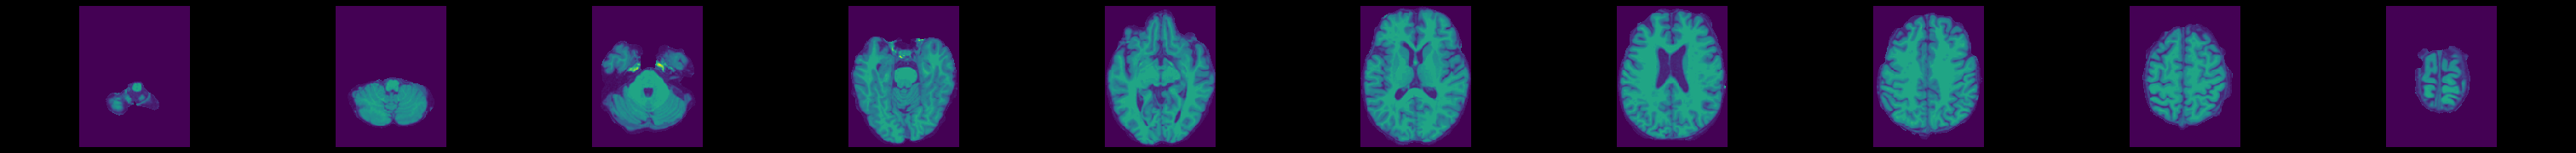

processed: ../../ADNI/002_S_0413/FreeSurfer_Cross-Sectional_Processing_brainmask/2007-06-01_07_04_09.0/S32938/mri/image.nii


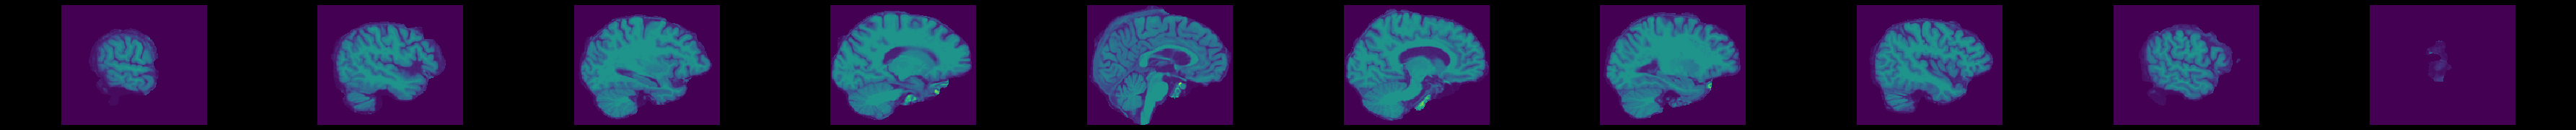

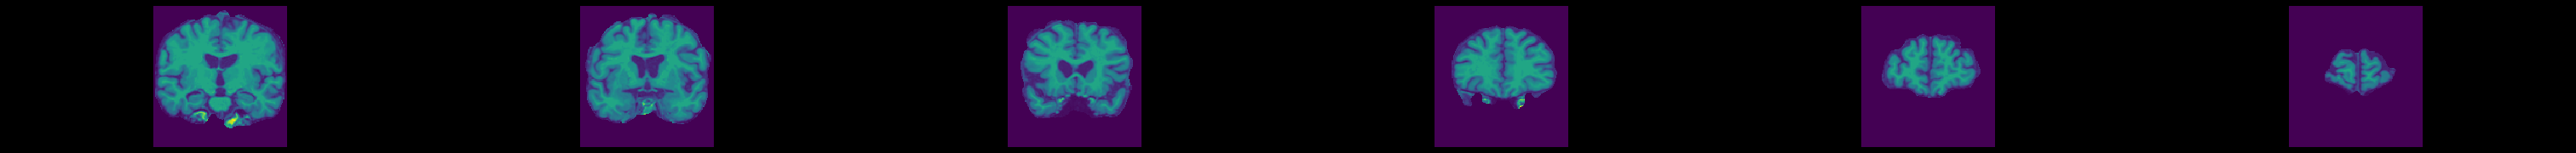

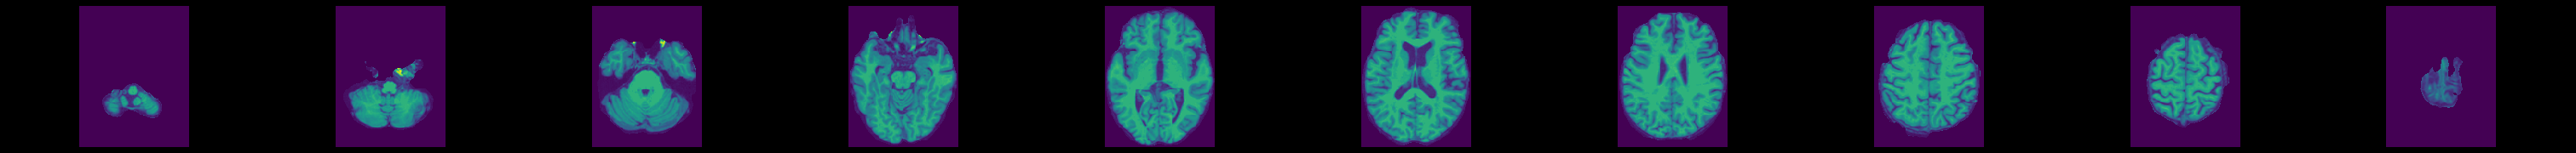

processed: ../../ADNI/002_S_0413/FreeSurfer_Cross-Sectional_Processing_brainmask/2008-07-31_14_39_56.0/S54591/mri/image.nii


KeyboardInterrupt: 

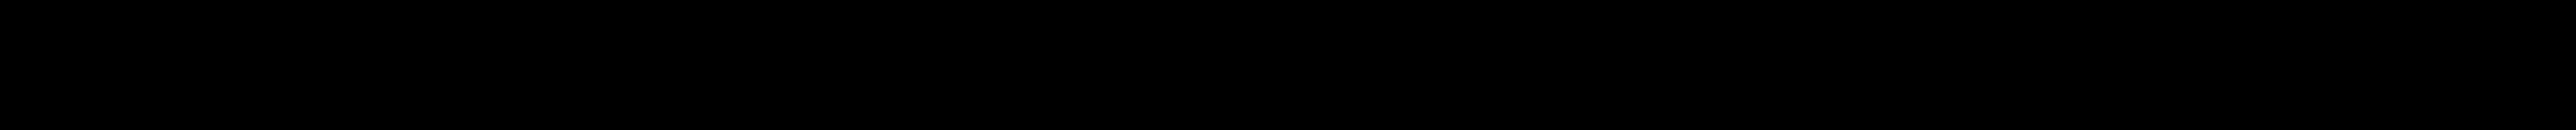

In [18]:
import argparse as argp
import nibabel as nib
import numpy as np
import os
import csv
from nilearn import plotting

padding = 0
arr = range(0, 256, 14)
ratio_map = {}

def dive(root):
    for f in os.listdir(root):
        path = rf'{root}/{f}'
        if f.endswith('.mgz'):
#             nii_path = convert(root, f)
            clean_space(root, f)
            print(f'processed: {root}/image.nii')
        elif os.path.isdir(path):
            dive(path)
            if os.path.exists(rf'{root}/clipped.csv'):
                if f in converted_dirs:
                    continue
                # write to csv
                with open(rf'{root}/clipped.csv', 'a+', newline='') as csvfile:
                    fwriter = csv.writer(csvfile)
                    fwriter.writerow([f])
                    print([f])
            
def convert(root, f):
    os.system(rf'mri_convert {root}/{f} {root}/image.nii')
    return rf'{root}/image.nii'

def clean_axis(np_img, path, axis=0):
    x_len, y_len, z_len = len(np_img), len(np_img[0]), len(np_img[0, 0])
    zero_mask = np.zeros(0)
    del_inds = []
    save_i = -1
    iter_len = 0
    continuity_warning = 0
    
    if axis == 0: 
        zero_mask = np.zeros((y_len, z_len))
        iter_len = x_len
    elif axis == 1: 
        zero_mask = np.zeros((x_len, z_len))
        iter_len = y_len
    elif axis == 2: 
        zero_mask = np.zeros((x_len, y_len))
        iter_len = z_len
    for i in range(iter_len):
        plane = np.sum(np_img[i] != zero_mask) if axis == 0 else np.sum(np_img[:, i] != zero_mask) if axis == 1 else np.sum(np_img[:, :, i] != zero_mask) 
        if plane == 0: 
            del_inds.append(i)
            if save_i + 1 != i: continuity_warning += 1
            save_i = i

    # cannot allow two breakpoints in del_inds
    if continuity_warning >= 2: print(f'\x1b[31m broken del_inds: {path} \n axis: {axis} \x1b[0m') 
        
    # remove empty slices
    np_img = np.delete(np.swapaxes(np_img, 0, axis), del_inds, 0)
    return np.swapaxes(np_img, 0, axis)

    # add padding
    #     np_img = np.insert(np_img, [0 for i in range(padding)], zero_mask, 0)
    #     np_img = np.insert(np_img, [len(np_img) for i in range(padding)], zero_mask, 0)
    
# clean the 0-intensity space surrounding the brain
def clean_space(root, f):
    mgz_path = rf'{root}/{f}'
    nii_path = rf'{root}/image.nii'
    img = nib.load(mgz_path)
    np_img = np.array(img.get_fdata())
    
    #clean axes
    np_img = clean_axis(np_img, mgz_path, axis=0)
    np_img = clean_axis(np_img, mgz_path, axis=1)
    np_img = clean_axis(np_img, mgz_path, axis=2)
    
    # write to disk
    feat = nib.Nifti1Image(np_img, img.affine)
    nib.save(feat, nii_path)

    #show image
    img = nib.load(nii_path)
    plotting.plot_img(img,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='x')
    plotting.plot_img(img,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='y')
    plotting.plot_img(img,cut_coords=arr,draw_cross=False,annotate=False,black_bg=True,display_mode='z')
    plotting.show()

    
converted_dirs = set()

if __name__ == '__main__':
#     parser = argp.ArgumentParser(description='convert .mgz files to .nii')
#     parser.add_argument('path', type=str, nargs=1)
#     args = parser.parse_args()
    if os.path.exists('../../ADNI/clipped.csv'):
        with open('../../ADNI/clipped.csv', 'r+') as csvfile:
            freader = csv.reader(csvfile)
            for row in freader:
                converted_dirs |= set(row)
        print('dirs:', converted_dirs)
    dive('../../ADNI')


In [ ]:
file_list = sorted(list(ratio_map.keys()), key=lambda x: ratio_map[x])
print(f'sorted images: {str(file_list[:10])} ...\n\n\n... {str(file_list[-10:])}')
print(sorted(list(ratio_map.values())))